<a href="https://colab.research.google.com/github/Rodrigomoreira-bd/credit_score_python_machine_learning/blob/main/CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Risco de Crédito com Machine Learning**

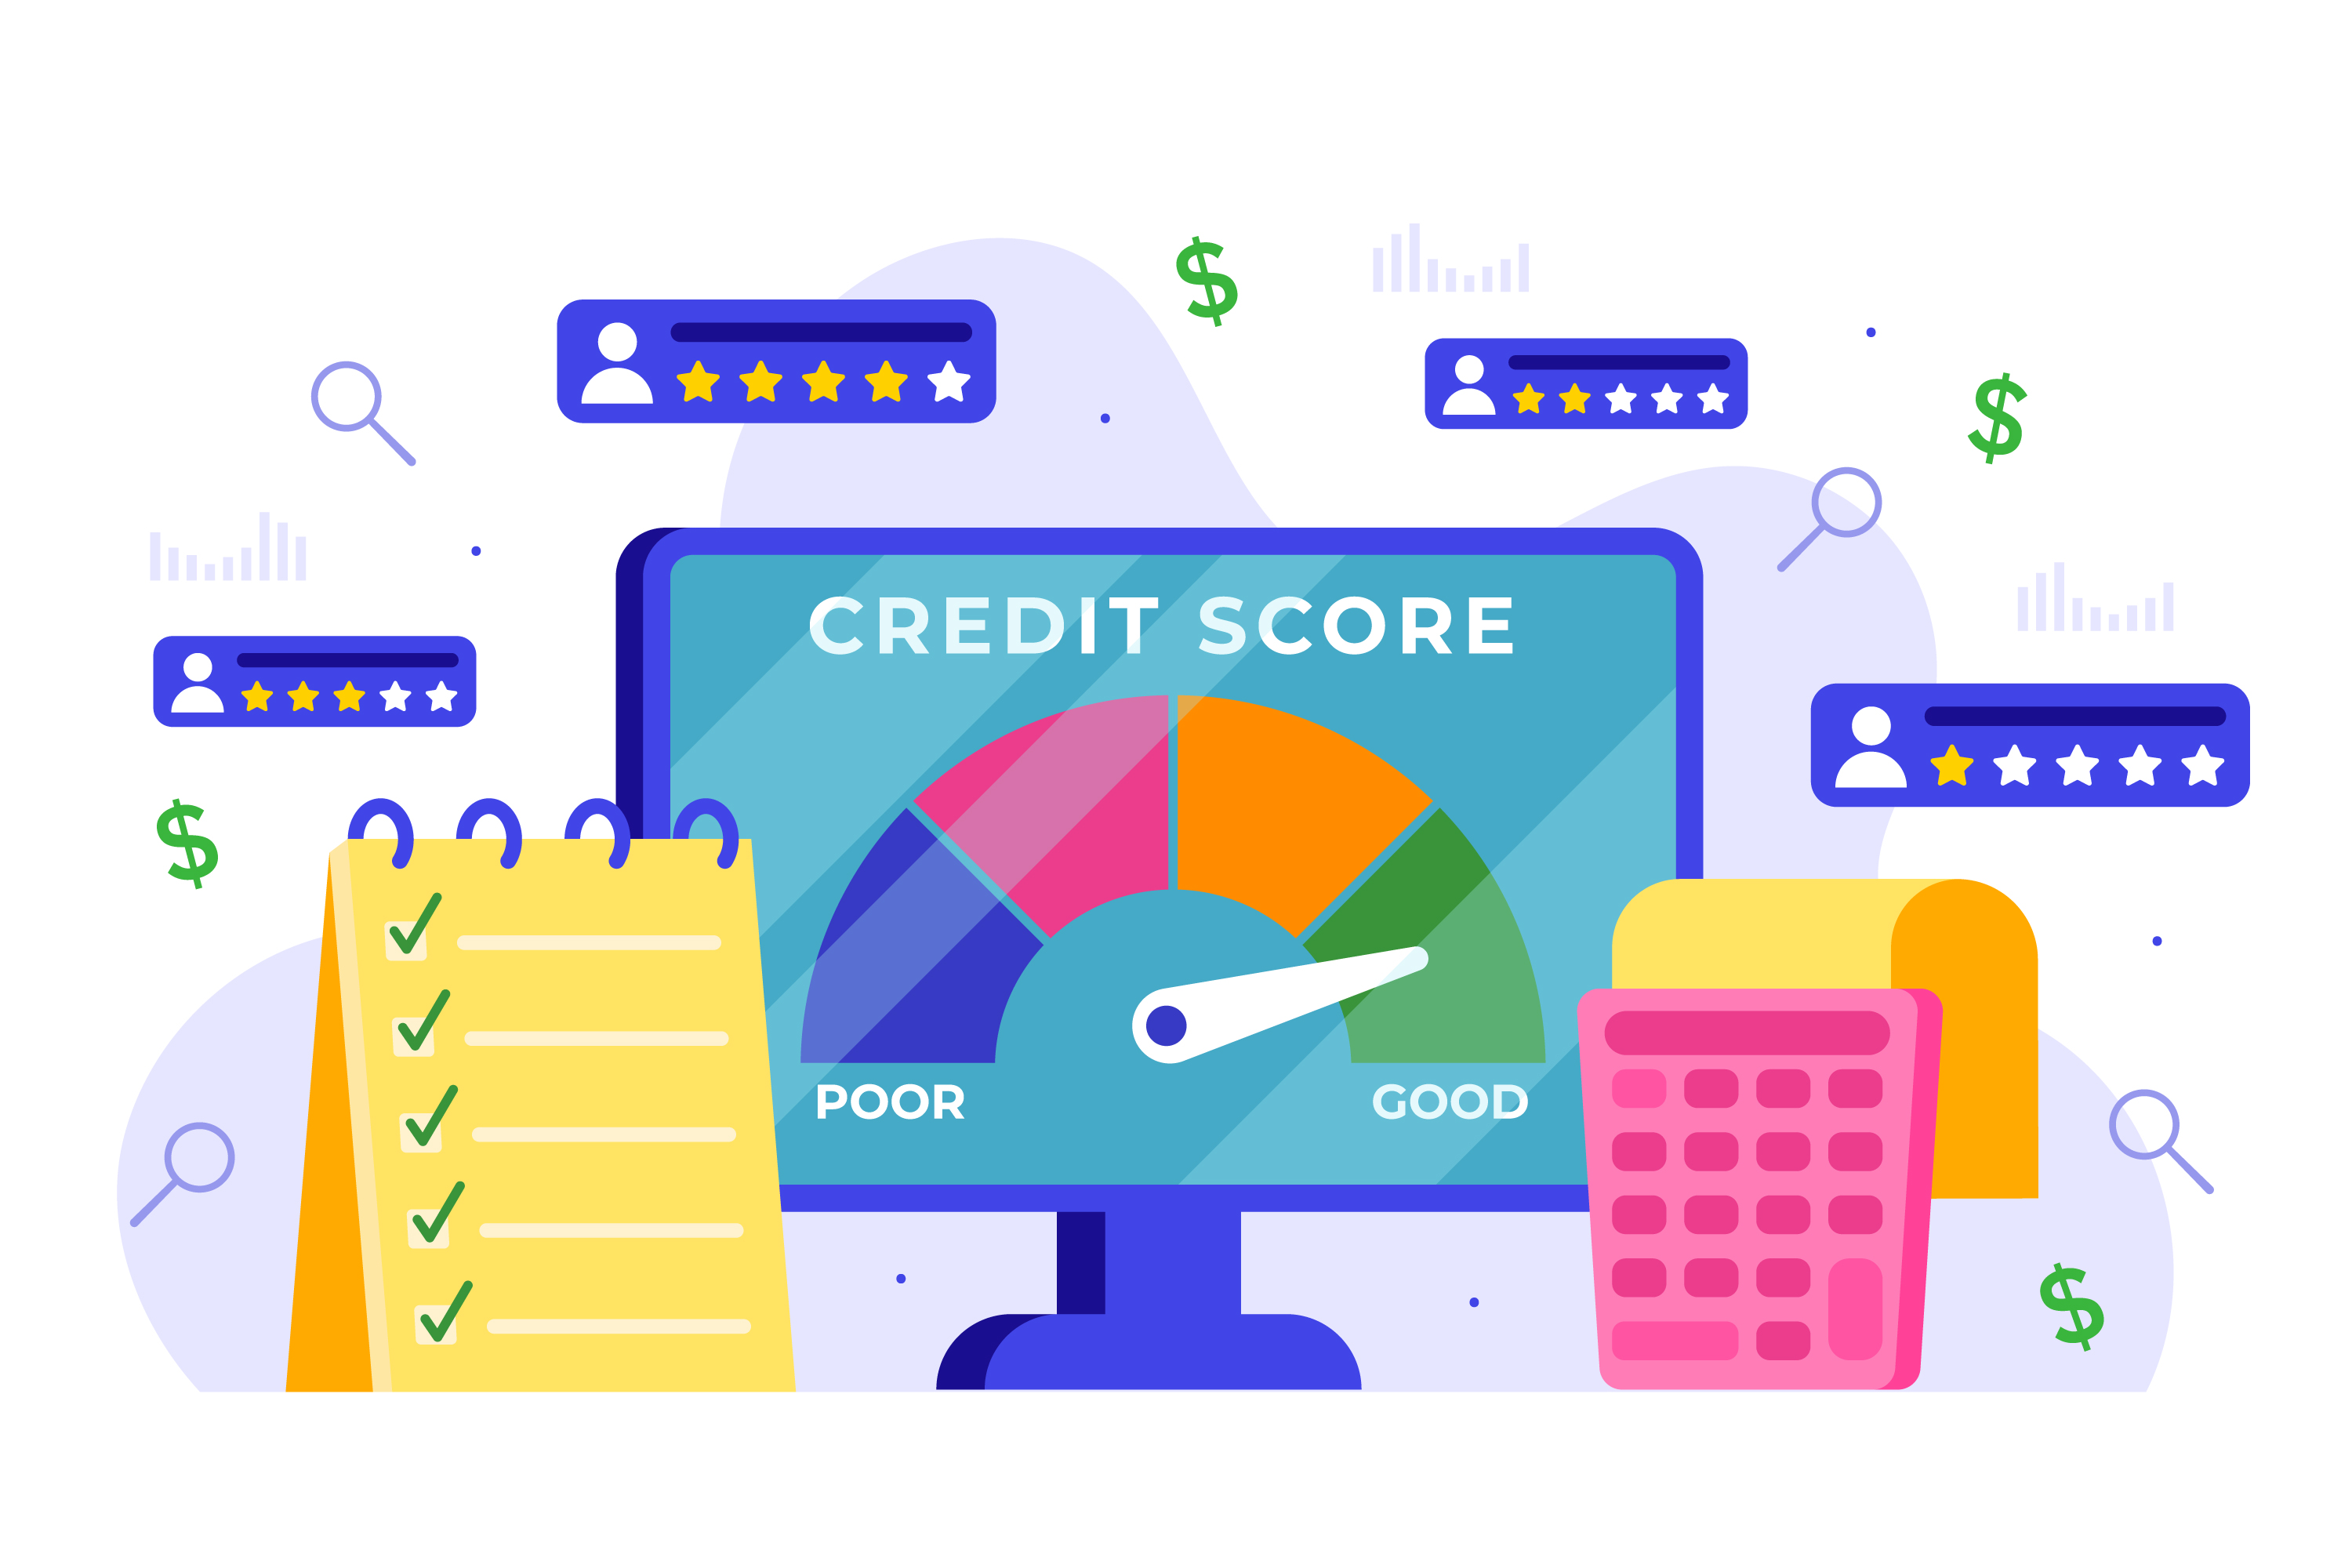

<a href='https://br.freepik.com/fotos-vetores-gratis/cartao-de-credito'>Cartão de crédito vetor criado por freepik - br.freepik.com</a>

O objetivo desse modelo é apresentar uma solução utilizando machine learning capaz de gerar score de crédito com base em dados passados dos clientes.

O Score de Crédito, é o resultado de um cálculo estatístico (Regressão Logística) que tem por objetivo ajudar os consumidores e as empresas a realizarem negócios com crédito, com menor custo e maior agilidade.

(O que é geração de score na análise de crédito? - A Ibratan https://www.ibratan.com.br)

A regressão logística é um modelo estatístico usado para determinar a probabilidade de um evento acontecer. Ele mostra a relação entre os recursos e, em seguida, calcula a probabilidade de um determinado resultado. A regressão logística é usada no aprendizado de máquina (ML) para ajudar a criar previsões precisas. (O que é regressão logística? | TIBCO Software https://www.tibco.com › pt-br › what-is-logistic-regression)


O modelo apresentado utiliza como base o Framework crisp-DM.
Criado em 1996, CRISP-DM (veja a documentação: https://github.com/Rodrigomoreira-bd/credit_score_python_machine_learning) consiste em um conjunto de boas práticas (aka metodologia) para se executar um projeto em Ciência de Dados, ou nos dias de hoje, popularmente chamado de Data Science.
(https://dnc.group/blog/data-science/metodologia-crisp-dm/)




#**Análise Exploratória dos Dados**

Começaremos configurando o notebook em google colab importando a biblioteca pandas e configurando a chamada da base de dados em CSV que se encontra em um repositório privado no google drive.

In [5]:
#configurando o notebook
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Carregamos a base CSV do google drive para dentro do google colab utilizando a biblioteca pandas, atribuimos a base a um objeto chamado "df" e apresentamos o cabeçalho do dataframe para ter uma visão parcial dos dados.

In [6]:
#carregamento dos dados
df = pd.read_csv('/content/drive/MyDrive/projeto_creditscore/Curso/aula3/dataset_trat.csv',sep=';')
df.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,200510,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,200510,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,200510,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,200510,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,200510,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Utilizaremos o método "info" para obter mais informações sobre os dados carregados.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   SAFRA      30000 non-null  int64
 2   LIMIT_BAL  30000 non-null  int64
 3   SEX        30000 non-null  int64
 4   EDUCATION  30000 non-null  int64
 5   MARRIAGE   30000 non-null  int64
 6   AGE        30000 non-null  int64
 7   PAY_0      30000 non-null  int64
 8   PAY_2      30000 non-null  int64
 9   PAY_3      30000 non-null  int64
 10  PAY_4      30000 non-null  int64
 11  PAY_5      30000 non-null  int64
 12  PAY_6      30000 non-null  int64
 13  BILL_AMT1  30000 non-null  int64
 14  BILL_AMT2  30000 non-null  int64
 15  BILL_AMT3  30000 non-null  int64
 16  BILL_AMT4  30000 non-null  int64
 17  BILL_AMT5  30000 non-null  int64
 18  BILL_AMT6  30000 non-null  int64
 19  PAY_AMT1   30000 non-null  int64
 20  PAY_AMT2   30000 non-null  int64
 21  PAY_AMT3   3

É possível notar que o dataframe tem 30.000 linhas e 26 colunas.

#**Dicionário de Dados**

Vamos entender melhor as variáveis presentes no dataframe (Veja a documentação: https://github.com/Rodrigomoreira-bd/credit_score_python_machine_learning).


ID: id atribuído a solicitação do cliente.

SAFRA: Mês em que o cliente fez a solicitação de crédito.

LIMIT BAL: Valor do Crédito concedido ao cliente.

SEX:  Gênero do cliente.

EDUCATION: Escolaridade do cliente.

MARRIAGE: Estado civil.

AGE: Idade do cliente.

PAY_0 - PAY_6: Histórico de pagamentos de Abril a Setembro da seguinte forma: PAY_0 (SETEMBRO)...PAY_6 (Abril).

BILL_AMT1 - BILL_AMT6: Valor do extrato da conta de Abril a Setembro da seguinte forma: BILL_AMT1 (SETEMBRO)...BILL_AMT6 (ABRIL).

PAY_AMT1 - PAY_AMT6: Valor do pagamento anterior de Abril a Setembro da seguinte forma: PAY_AMT1 (SETEMBRO)...PAY_AMT6 (ABRIL).

default: variável binária indica se realizou pagamento ou não (Variável Target).


#**Transformações**

Criaremos 3 variáveis com a média a soma e o valor máximo de pagamentos e dívidas do cliente nos último 6 meses.

In [9]:
#soma do valor das faturas nos últimos 6 meses.
df['SUM_BILL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

#média das faturas no últimos 6 meses.
df['AVG_BILL'] = df['SUM_BILL'] / 6

#valor máximo de endividamento do cliente nos últimos 6 meses
df['MAX_BILL'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].max(axis=1)


#soma dos pagamentos nos últimos 6 meses.
df['SUM_PAY'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']

#média dos pagamentos nos últimos 6 meses.
df['AVG_PAY'] = df['SUM_PAY'] / 6

#valor máximo pago pelo cliente nos últimos 6 meses (tentando estimar a capacidade de pagamento do cliente)
df['MAX_PAY'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].max(axis=1)

Para verificar as variáveis criadas no dataframe usaremos o método "head".

In [10]:
df.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SUM_BILL,AVG_BILL,MAX_BILL,SUM_PAY,AVG_PAY,MAX_PAY
0,1,200510,20000,2,2,1,24,2,2,-1,...,0,0,0,1,7704,1284.000000,3913,689,114.833333,689
1,2,200510,120000,2,2,2,26,-1,2,0,...,1000,0,2000,1,17077,2846.166667,3455,5000,833.333333,2000
2,3,200510,90000,2,2,2,34,0,0,0,...,1000,1000,5000,0,101653,16942.166667,29239,11018,1836.333333,5000
3,4,200510,50000,2,2,1,37,0,0,0,...,1100,1069,1000,0,231334,38555.666667,49291,8388,1398.000000,2019
4,5,200510,50000,1,2,1,57,-1,0,-1,...,9000,689,679,0,109339,18223.166667,35835,59049,9841.500000,36681


#**Divisão do Conjunto de Dados**

Como boas Práticas dividiremos o nosso conjunto de dados inicial em 3 partes:



1.  Treino = Usamos essa parte para ajustar o modelo (70%)
1.  Teste = Usamos essa parte para fazer comparações com o modelo de treino (30%)
2.  Validação = Após os testes e ajustes realizados usamos essa parte para validar e corrigir possíveis anomalias. Usaremos as safras 200605, 200606 e 200607 para fazer essa validação e chamaremos de "OOT".